Text(0.5,0,'Which was perceived first?')

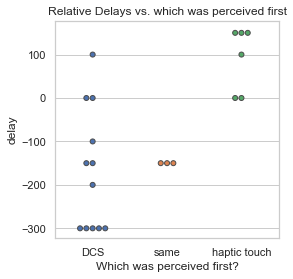

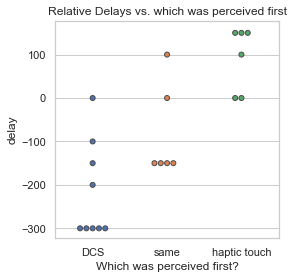

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as copy

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

delay = np.array([2700,2550,2500,2600,2700,2550,2700,2550,2550,2700,2800,2550,2400,2400,2800,2850,2400,2850,2400,2850,2400
         ])-2700

# felt first
# tactor = 0
# stim = 1 
# same = 2
firstFeel = np.array([1,2,1,1,0,2,0,1,1,1,0,2,1,1,1,0,1,0,1,0,1])

d = {'delay': delay, 'perception': firstFeel}
dataFrameInt = pd.DataFrame(data=d)
map_dict = {0: "haptic touch",1: "DCS",2:"same"}
dataFrameInt["type"] = dataFrameInt["perception"].map(map_dict)
#dataFrameInt = pd.DataFrame(delay,firstFeel)

font = {'size'   : 34}

mpl.rc('font', **font)

plt.figure(figsize=(4,4))
#ax = sns.stripplot(x="type", y="delay", data=dataFrameInt,jitter=True,linewidth=1);
ax = sns.swarmplot(x="type", y="delay", data=dataFrameInt,linewidth=1);


plt.title('Relative Delays vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
plt.savefig('TOJ_a1355e_perceptionTimes.png',dpi=600)

######################

firstFeelMoreSame = copy.copy(firstFeel)

# any he said were hard to say but slight edge for stim go to same
firstFeelMoreSame[[8,9,14]] = 2

dSame = {'delay': delay, 'perception': firstFeelMoreSame}
dataFrameIntSame = pd.DataFrame(data=dSame)
map_dict = {0: "haptic touch",1: "DCS",2:"same"}
dataFrameIntSame["type"] = dataFrameIntSame["perception"].map(map_dict)
#dataFrameInt = pd.DataFrame(delay,firstFeel)

font = {'size'   : 34}

mpl.rc('font', **font)

plt.figure(figsize=(4,4))
#ax = sns.stripplot(x="type", y="delay", data=dataFrameInt,jitter=True,linewidth=1);
ax = sns.swarmplot(x="type", y="delay", data=dataFrameIntSame,linewidth=1);


plt.title('Relative Delays vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
#plt.savefig('TOJ_a1355e_perceptionTimes_moreSame.png',dpi=600)



In [2]:
#####################
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns; sns.set()

#from bokeh.charts import BoxPlot, show
#from bokeh.io import push_notebook,show,output_notebook
#from bokeh.layouts import row
#from bokeh.plotting import figure 
#output_notebook()
sns.set_context("poster") # this makes things BIG for the poster 

# use matlab data 
TOJmat = loadmat('a1355e_TOJ_matlab.mat',squeeze_me=1)
epochedButton = TOJmat['epochedButton']
epochedStim = TOJmat['epochedStim']
epochedTactor = TOJmat['epochedTactor']
tactorStimDiff = TOJmat['tactorStimDiff']
responseTimes = TOJmat['responseTimes']
t = TOJmat['t']
epochedTactor = TOJmat['epochedTactor']

map_dict = {0: "haptic touch",1: "DCS",2:"same"}

data = pd.DataFrame({'responseTimes (ms)':1e3*responseTimes,
                     'tactorStimDiff (ms)':-1e3*tactorStimDiff,
                     'firstFelt':firstFeel,
                     'firstFeltSame':firstFeelMoreSame,
                     'setDelay (ms)':delay
                    })

data['firstFeelName'] = data['firstFelt'].map(map_dict)
data['firstFeelNameSame'] = data['firstFeltSame'].map(map_dict)                 




In [3]:
data

,responseTimes (ms),tactorStimDiff (ms),firstFelt,firstFeltSame,setDelay (ms),firstFeelName,firstFeelNameSame
0,532.60288,-206.23360,1,1,0,DCS,DCS
1,419.55328,-198.86080,2,2,-150,same,same
2,539.44320,-207.05280,1,1,-200,DCS,DCS
3,NaN,-125.99296,1,1,-100,DCS,DCS
4,329.19552,13.02528,0,0,0,haptic touch,haptic touch
5,334.31552,-122.83904,2,2,-150,same,same
6,440.72960,9.91232,0,0,0,haptic touch,haptic touch
7,331.57120,-140.98432,1,1,-150,DCS,DCS
8,275.00544,-138.52672,1,2,-150,DCS,same
9,265.42080,24.73984,1,2,0,DCS,same


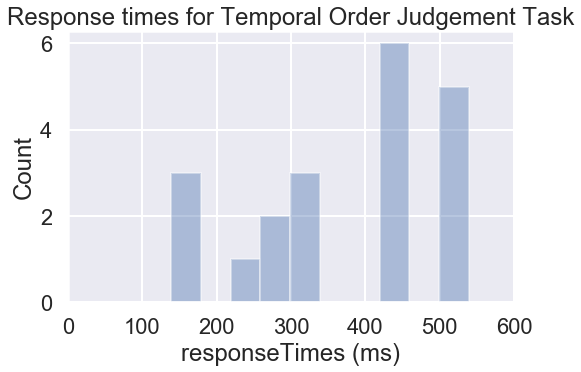

In [4]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data['responseTimes (ms)'].dropna(),bins=10,kde=False);
plt.title('Response times for Temporal Order Judgement Task')
ax.set_ylabel('Count')
ax.set_xlim([0,600])
plt.savefig('TOJ_a1355e_hist.png',dpi=600)


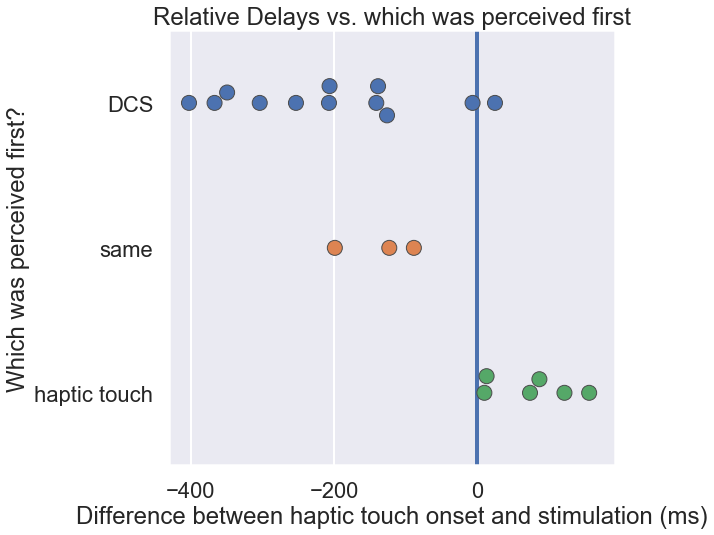

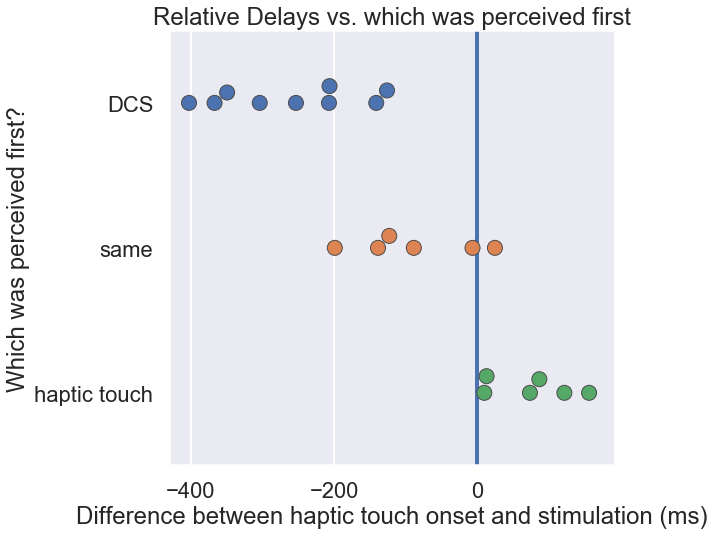

In [5]:
plt.figure(figsize=(8,8))
ax = sns.swarmplot(y="firstFeelName", x="tactorStimDiff (ms)", data=data,linewidth=1,size=15);
ax.axvline(x=0,linewidth=4)

plt.title('Relative Delays vs. which was perceived first')
ax.set_ylabel('Which was perceived first?')
ax.set_xlabel('Difference between haptic touch onset and stimulation (ms)')
plt.savefig('TOJ_a1355e_perceptionTimes_calculated.png',dpi=600)


plt.figure(figsize=(8,8))
ax = sns.swarmplot(y="firstFeelNameSame", x="tactorStimDiff (ms)", data=data,linewidth=1,size=15);
ax.axvline(x=0,linewidth=4)
plt.title('Relative Delays vs. which was perceived first')
ax.set_ylabel('Which was perceived first?')
ax.set_xlabel('Difference between haptic touch onset and stimulation (ms)')
plt.savefig('TOJ_a1355e_perceptionTimes_calculated_Same.png',dpi=600)




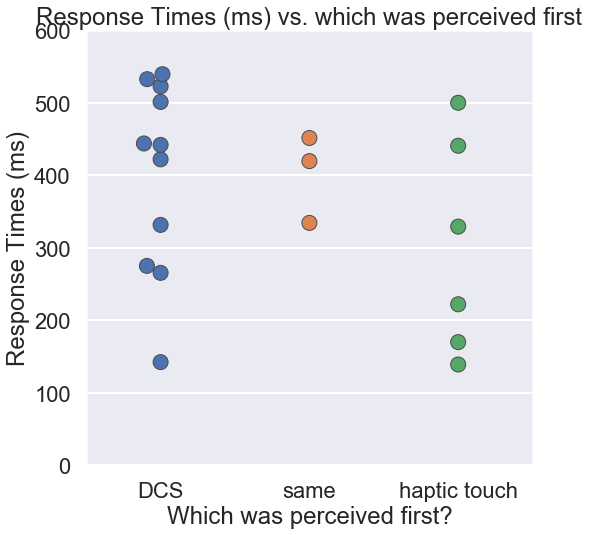

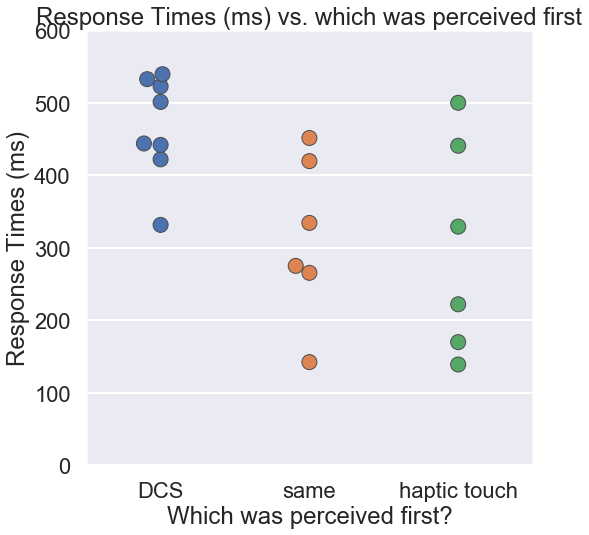

In [6]:
plt.figure(figsize=(8,8))
ax = sns.swarmplot(x="firstFeelName", y="responseTimes (ms)", data=data,linewidth=1,size=15);
plt.title('Response Times (ms) vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
ax.set_ylabel('Response Times (ms)')
ax.set_ylim([0,600])
plt.savefig('TOJ_a1355e_responseTimes_calculated.png',dpi=600)


plt.figure(figsize=(8,8))
ax = sns.swarmplot(x="firstFeelNameSame", y="responseTimes (ms)", data=data,linewidth=1,size=15);
plt.title('Response Times (ms) vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
ax.set_ylabel('Response Times (ms)')
ax.set_ylim([0,600])
plt.savefig('TOJ_a1355e_responseTimes_calculated_Same.png',dpi=600)



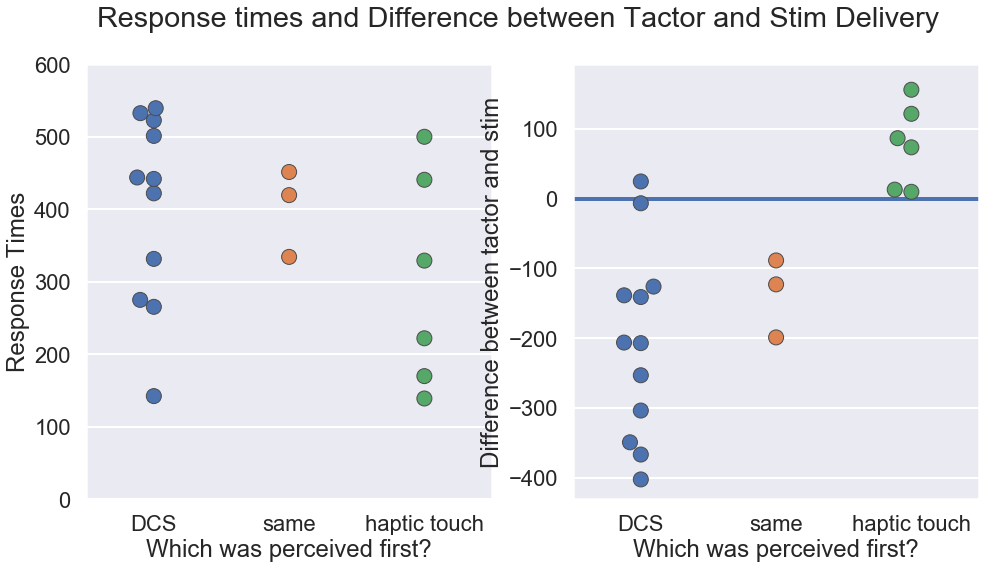

In [7]:
fig, ax = plt.subplots(1, 2,figsize=(16,8))
sns.swarmplot(x="firstFeelName", y="responseTimes (ms)", data=data,linewidth=1,size=15,ax=ax[0]);
ax[0].set_xlabel('Which was perceived first?')
ax[0].set_ylabel('Response Times')
ax[0].set_ylim([0,600])

sns.swarmplot(x="firstFeelName", y="tactorStimDiff (ms)", data=data,linewidth=1,size=15,ax=ax[1]);
ax[1].set_xlabel('Which was perceived first?')
ax[1].set_ylabel('Difference between tactor and stim')
ax[1].axhline(y=0,linewidth=4)
plt.suptitle('Response times and Difference between Tactor and Stim Delivery')
plt.savefig('TOJ_a1355e_both_calculated_v2.png',dpi=600)
plt.savefig('TOJ_a1355e_both_calculated_v2.svg')

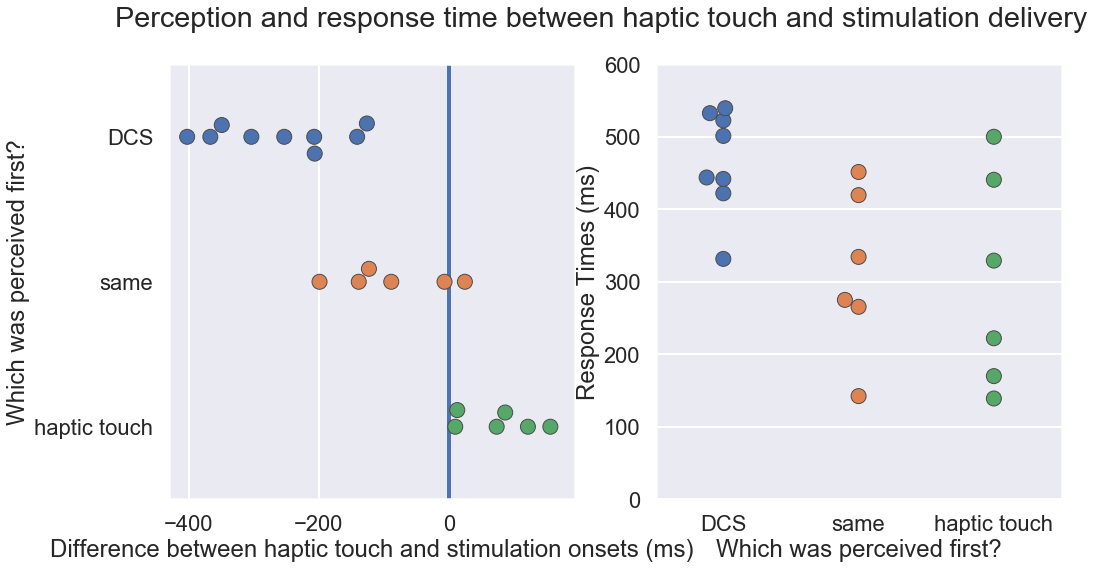

In [8]:
fig, ax = plt.subplots(1, 2,figsize=(16,8))


sns.swarmplot(y="firstFeelNameSame", x="tactorStimDiff (ms)", data=data,linewidth=1,size=15,ax=ax[0]);
ax[0].set_ylabel('Which was perceived first?')
ax[0].set_xlabel('Difference between haptic touch and stimulation onsets (ms)')
ax[0].axvline(x=0,linewidth=4)

sns.swarmplot(x="firstFeelNameSame", y="responseTimes (ms)", data=data,linewidth=1,size=15,ax=ax[1]);
#ax[1].axis.set_visible(False)
ax[1].set_xlabel('Which was perceived first?')
ax[1].set_ylabel('Response Times (ms)')
ax[1].set_ylim([0,600])

plt.suptitle('Perception and response time between haptic touch and stimulation delivery')
plt.savefig('TOJ_a1355e_both_calculatedSame_v2.png',dpi=600)
plt.savefig('TOJ_a1355e_both_calculatedSame_v2.svg')

In [9]:
dfGroup = data.groupby(['firstFeelNameSame']).describe()
dfGroup[['tactorStimDiff (ms)','responseTimes (ms)']]

tactorStimDiff (ms)                                    \
                                count        mean        std        min   
firstFeelNameSame                                                         
DCS                               9.0 -261.738951  99.637215 -402.47296   
haptic touch                      6.0   76.881920  58.269892    9.91232   
same                              6.0  -88.425813  84.142486 -198.86080   

                                                               \
                         25%        50%        75%        max   
firstFeelNameSame                                               
DCS               -349.26592 -253.13280 -206.23360 -125.99296   
haptic touch        28.18048   80.19968  112.98816  156.22144   
same              -134.60480 -105.67680  -27.04384   24.73984   

                  responseTimes (ms)                                     \
                               count        mean         std        min   
firstFeelNameSame                                                         
DCS                              8.0  466.913280   71.061928  331.57120   
haptic touch                     6.0  300.120747  148.084290  138.93632   
same                             6.0  314.668373  112.981653  142.25408   

                                                               
                         25%        50%        75%        max  
firstFeelNameSame                                              
DCS                436.94080  472.55552  525.13792  539.44320  
haptic touch       182.86592  275.59936  412.84608  500.03968  
same               267.81696  304.66048  398.24384  451.46112

In [10]:
#sub1_tact = dataCleaned[experiment["tactor"]][Subject["1"]]
stim = data[(data.firstFeelNameSame =='DCS')]['responseTimes (ms)'].dropna()
tactor = data[(data.firstFeelNameSame =='haptic touch')]['responseTimes (ms)'].dropna()
same = data[(data.firstFeelNameSame =='same')]['responseTimes (ms)'].dropna()
scipy.stats.kruskal(stim,same,tactor)


KruskalResult(statistic=7.752380952380946, pvalue=0.02072964502964982)

In [11]:
groups = [same.values,stim.values,tactor.values]

from nemenyi import kw_nemenyi

kw_nemenyi(groups, [(0, 1),(1,2),(0, 2)])

(7.752380952380946,
 0.02072964502964982,
 array([0.06420744, 0.03782231, 0.9       ]),
 array([False,  True, False]))

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

dataStats = data['responseTimes (ms)'].dropna()
groupsStats = data['firstFeelNameSame'].loc[data['responseTimes (ms)']!=np.nan]
goodInds = data['responseTimes (ms)'].dropna().index.values
goodInds = goodInds.tolist()
groupsStats = groupsStats.iloc[goodInds]


tukey = pairwise_tukeyhsd(endog=dataStats,     # Data
                          groups=groupsStats,   # Groups
                          alpha=0.05)          # Significance level


tukey.summary()


group1,group2,meandiff,lower,upper,reject
DCS,haptic touch,-166.7925,-320.3028,-13.2823,True
DCS,same,-152.2449,-305.7551,1.2653,False
haptic touch,same,14.5476,-149.5617,178.657,False


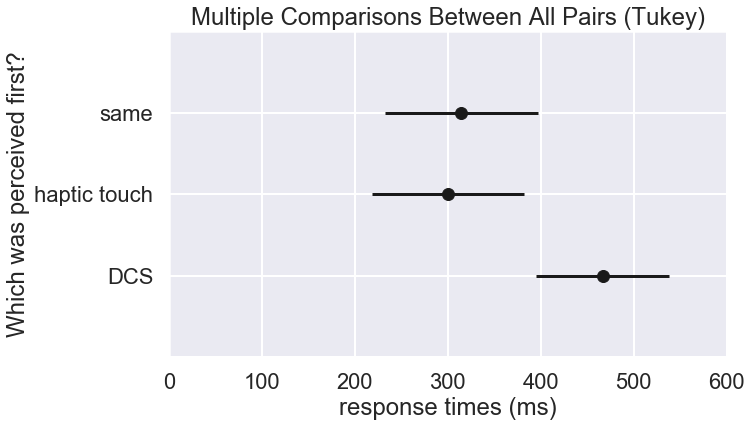

In [13]:
fig,ax = plt.subplots(1)
tukey.plot_simultaneous(ax=ax)    # Plot group confidence intervals
ax.set_xlabel('response times (ms)')
ax.set_ylabel('Which was perceived first?')
ax.set_xlim([0,600])
plt.savefig('TOJ_tukeySame.png',dpi=600)